In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv', header=None, names=['x1','x2','y'])

In [3]:
df.head()

,x1,x2,y
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [4]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [5]:
y

0     0.0
1     1.0
2     0.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    0.0
99    0.0
Name: y, Length: 100, dtype: float64

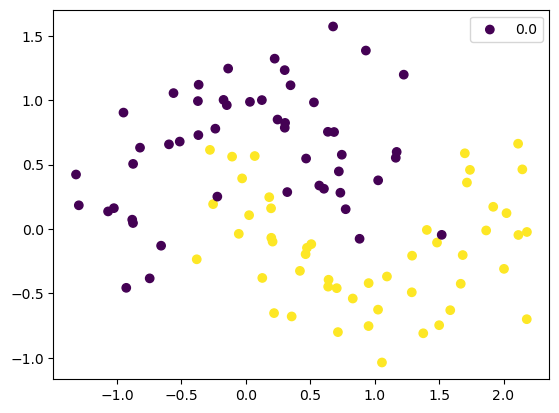

In [6]:
plt.scatter(X.values[:,0], X.values[:,1], c=y)
plt.legend(y)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

C:\Users\Fazz Com 03364446969\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


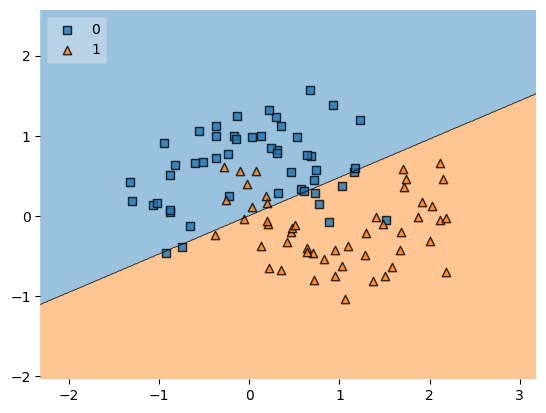

In [8]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.astype(int).values, clf, legend=2)
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf, X, y , cv=10, scoring='accuracy'))

np.float64(0.8300000000000001)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_trf = poly.fit_transform(X)

In [11]:
clf1 = LogisticRegression()
clf1.fit(X_trf, y)

LogisticRegression()

In [12]:
np.mean(cross_val_score(clf1, X_trf, y , cv=10, scoring='accuracy'))

np.float64(0.9)

In [15]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

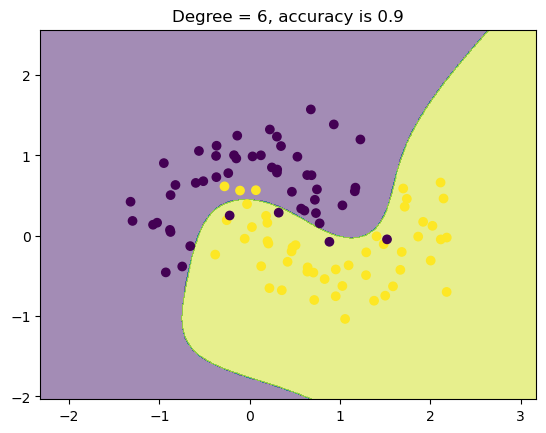

In [22]:
plot_decision_boundary(X.values, y.values.astype(int), degree=6)